In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

2023-10-12 15:37:56.180273: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 15:37:56.257808: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-12 15:37:56.257852: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-12 15:37:56.257895: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-12 15:37:56.270233: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 15:37:56.271114: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test)= mnist.load_data()
input_shape = (28, 28, 1)

In [3]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],28, 28, 1)

print("Data type of x_train :",x_train.dtype)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

print("Data type after converting to float :",x_train.dtype)

Data type of x_train : uint8
Data type after converting to float : float32


In [4]:
x_train = x_train / 255
x_test = x_test / 255

print("Shape of Training :" , x_train.shape)
print("Shape of Testing :" , x_test.shape)

Shape of Training : (60000, 28, 28, 1)
Shape of Testing : (10000, 28, 28, 1)


In [5]:
model = Sequential()
model.add(Conv2D(28, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [6]:
model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, epochs = 2)

2023-10-12 15:38:02.499080: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/2
1875/1875 [==============================] - 56s 29ms/step - loss: 0.2054 - accuracy: 0.9381
Epoch 2/2
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0867 - accuracy: 0.9732


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0682 - accuracy: 0.9771
Loss=0.068
Accuracy=0.977


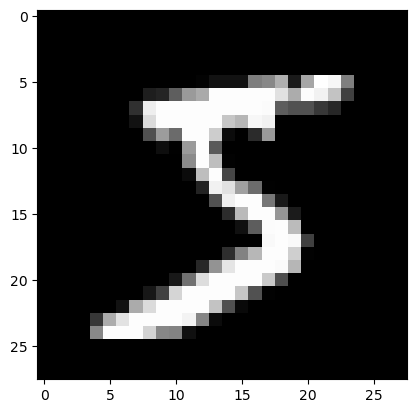

In [8]:
image = x_train[0]
plt.imshow(np.squeeze(image),cmap="gray")
plt.show()

In [9]:
image= image.reshape(1,image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Predicted class : {}".format(np.argmax(predict_model)))

1/1 [==============================] - 0s 109ms/step
Predicted class : 5
